NLP_df_labeled 
ggl sheet: NLP_df_unlimit_final_more_for_upload     


In [ ]:
'''git remote add origin https://github.com/knnatt/Twitter_NLP
git add twitter-gpt.ipynb        
git commit -m "testing first repository"      
change branch->  git checkout -b TUNA-TUNING-VISUAL
this file is modified after lstm_v.sukree_keras_relevance_gridSearch and run with hyper parameter from Natt_boom_boom.ipynb

'''

In [7]:
'''! pip install pandas
! pip install keras
! pip install pythainlp
! pip install scikit-learn
! pip install numpy
! pip install matplotlib
! pip install seaborn'''


'! pip install pandas\n! pip install keras\n! pip install pythainlp\n! pip install scikit-learn\n! pip install numpy\n! pip install matplotlib\n! pip install seaborn'

In [2]:
import os
import re
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from pythainlp.tokenize import word_tokenize
#from sklearn.metrics import confusion_matrix
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize

In [3]:
def stopwords_rm(text):
    stopwords = set(thai_stopwords())
    stopwords.update(["nan", "-", "_", "", " ", "฿" ,"ค่ะ", "ครับ", "จ้า"])  # Add more stopwords as needed

    # Remove stopwords from the text
    cleaned_text = ' '.join(word for word in text.split() if word not in stopwords)
    return cleaned_text


def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def normie(df):
    print('cleaning . . .')
    i = 0 #row number
    df['cleaned1'] = ''
    for row in df['cleaned']:
        clean = ''
        j = row.split(' ') #j is array of string
        for word in j:
            clean = clean + ' ' + normalize(word) #spell(word)[0] #correct(word)
        df['cleaned1'].iloc[i] = clean
        i += 1
    print('done cleaning by normalization')
    return df['cleaned1']
def alone(df):
    print('Are you alone?')
    i = 0 #row number
    df['cleaned1'] = ''
    for row in df['cleaned']:
        words = row.split() #j is array of string
        cleaned = [word for word in words if len(word) > 1]
        cleaned_string = " ".join(cleaned)
        df['cleaned1'].iloc[i] = cleaned_string
        i += 1
    print('done cleaning alone')
    return df['cleaned1']


In [4]:
df_1 = pd.read_csv("./df_y4s2_final_new.csv")
#df_1 = df_1.dropna(subset='mentioned_location') #new jet

In [5]:
df_1['relevant'].value_counts() 

relevant
False    3327
True      271
Name: count, dtype: int64

In [6]:
df_all = pd.read_csv("./df_y4s2_v1_Natt48.csv") #have chad chat 48 true entries
df_all1 = pd.concat([df_1,df_all])
df_all1['Chadchad'] = df_all1['Chadchad'].fillna('no')
df_all1 = df_all1.drop_duplicates(subset='tweet_text', keep='last')
df_a = df_all1


In [7]:
df_a['relevant'].value_counts() 

relevant
False    3334
True      312
Name: count, dtype: int64

random drop false num_drop(3008 data entries) for resolve imbalance data

In [8]:
num_drop = int(df_a[df_a['relevant'] == False].shape[0]) - int(df_a[df_a['relevant'] == True].shape[0])
np.random.seed(int(time.time()))
false_rows = df_a[df_a['relevant'] == False]
rows_to_keep = false_rows.sample(n=312, random_state=42) 

df_dropped = df_a[df_a['relevant'] != False]
df_a = pd.concat([df_dropped,rows_to_keep])
df_a['relevant'].value_counts() #balanced 

relevant
True     312
False    312
Name: count, dtype: int64

In [9]:
df_a['split_text'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm",keep_whitespace=False), axis=1) #use this
df_a['combined'] = [' '.join(lst) for lst in df_a['split_text']]
df_a['cleaned'] = df_a['combined'].apply(deEmojify)
df_a['cleaned'] = df_a['cleaned'].apply(stopwords_rm) #use in X
#df_a['cleaned'] = normie(df_a)
df_a['cleaned'] = alone(df_a)
df_a['split_cleaned'] = df_a.apply(lambda row: word_tokenize(row['cleaned'],engine="newmm",keep_whitespace=False), axis=1) #use in counting words

#newmm cuts better than nemm-safe ศร, ีฯ ค่,ะ #attacut is virus
#try other engine or break larger, add space in between  
#df_a['split_text2'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm-safe",keep_whitespace=False), axis=1)'''


Are you alone?
done cleaning alone


C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\415578056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] = cleaned_string
C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\415578056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] = cleaned_string
C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\415578056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] 

https://pythainlp.github.io/dev-docs/api/tokenize.html

In [10]:
df_a['relevance_nlp'] = df_a['relevant'].apply(lambda x: 'relevant' if x else 'not relevant')
df_a = df_a.dropna(subset=['tweet_text'])
df_a['contain_area'],df_a['contain_good'] = '2','2'
for i in range(df_a['split_cleaned'].shape[0]):
    if 'ดี' in df_a['split_cleaned'].iloc[i]:
        df_a['contain_good'].iloc[i] = '1'
    else:
        df_a['contain_good'].iloc[i] = '0'

for i in range(df_a['split_cleaned'].shape[0]):
    if 'พื้นที่' in df_a['split_cleaned'].iloc[i]:
        df_a['contain_area'].iloc[i] = '1'
    else:
        df_a['contain_area'].iloc[i] = '0'
df_a = df_a.dropna(subset=['tweet_text'])

C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\3348223842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0'
C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\3348223842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0'
C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\3348223842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0

In [11]:
df_a['word_length'] = df_a['split_cleaned'].str.len()

In [12]:
df_a['word_length'].sort_values(ascending=False) 

2768    132
2770     93
2783     79
2797     76
2771     76
       ... 
1338      4
409       4
2765      4
127       3
2758      2
Name: word_length, Length: 624, dtype: int64

In [13]:
df_a


,index,username,tweet_id,tweet_text,translated_text,org_step_1,org_step_2,relevant,category,query,...,Chadchad,split_text,combined,cleaned,cleaned1,split_cleaned,relevance_nlp,contain_area,contain_good,word_length
2769,2519,SersTytmissmay,1.670000e+18,ก็ถ้าไม่อยากจ่ายค่าปรับ 2000 ก็หยุดเถอะ ทุกวัน...,"Well, if you don't want to pay the 2000 baht f...",สนง.ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ดิน...",...,no,"[ก็, ถ้า, ไม่, อยาก, จ่าย, ค่าปรับ, 2000, ก็, ...",ก็ ถ้า ไม่ อยาก จ่าย ค่าปรับ 2000 ก็ หยุด เถอะ...,จ่าย ค่าปรับ 2000 หยุด เลิกงาน เดิน กลับบ้าน พ...,จ่าย ค่าปรับ 2000 หยุด เลิกงาน เดิน กลับบ้าน พ...,"[จ่าย, ค่าปรับ, 2000, หยุด, เลิกงาน, เดิน, กลั...",relevant,0,0,22
2797,2548,yoktipp3,1.670000e+18,เห็นรถใหญ่ปีนขึ้นมาจอดบนฟุตบาท เขตเพิ่งทำพื้นแ...,Saw a large car climb up and park on the sidew...,สนง.ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ดิน...",...,no,"[เห็น, รถ, ใหญ่, ปีน, ขึ้น, มา, จอด, บน, ฟุตบา...",เห็น รถ ใหญ่ ปีน ขึ้น มา จอด บน ฟุตบาท เขต เพิ...,รถ ปีน จอด ฟุตบาท เขต ทำ พื้น แตก แผ่น มอไซด์ ...,รถ ปีน จอด ฟุตบาท เขต ทำ พื้น แตก แผ่น มอไซด์ ...,"[รถ, ปีน, จอด, ฟุตบาท, เขต, ทำ, พื้น, แตก, แผ่...",relevant,0,0,15
2883,2635,sn_inmymind,1.670000e+18,ฟุตบาทเพชรบุรีมุ่งหน้าอโศกเลยจ่ะ ฉันเดินไปทำงา...,Phetchaburi footpath heading towards Asoke. I ...,สนง.ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""อนุ...",...,no,"[ฟุตบาท, เพชรบุรี, มุ่งหน้า, อโศก, เลย, จ่ะ, ฉ...",ฟุตบาท เพชรบุรี มุ่งหน้า อโศก เลย จ่ะ ฉัน เดิน...,ฟุตบาท เพชรบุรี มุ่งหน้า อโศก จ่ะ เดิน ทำงาน ค...,ฟุตบาท เพชรบุรี มุ่งหน้า อโศก จ่ะ เดิน ทำงาน ค...,"[ฟุตบาท, เพชรบุรี, มุ่งหน้า, อโศก, จ่ะ, เดิน, ...",relevant,0,0,33
2916,2668,PuPoPu_error,1.670000e+18,ไปเดินเที่ยว เห็นเลยค่ะ ว่าสกปรก ถนนบรรทัดทอง...,Went for a walk and saw that Banthat Thong Roa...,สนง.โยธา,สนง.โยธา,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",...,no,"[ไป, เดินเที่ยว, เห็น, เลย, ค่ะ, ว่า, สกปรก, ถ...",ไป เดินเที่ยว เห็น เลย ค่ะ ว่า สกปรก ถนน บรรทั...,เดินเที่ยว สกปรก ถนน บรรทัด ทอง เยาวราช เส้น ร...,เดินเที่ยว สกปรก ถนน บรรทัด ทอง เยาวราช เส้น ร...,"[เดินเที่ยว, สกปรก, ถนน, บรรทัด, ทอง, เยาวราช,...",relevant,0,0,25
2958,2710,jerry24hrs,1.670000e+18,มันไม่ทำกรวยอะไรหรอก เจริญกรุงทั้งเส้น วางสองฝ...,It doesn't cone anything. Charoen Krung the wh...,สนง.โยธา,สนง.โยธา,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""เจร...",...,no,"[มัน, ไม่, ทำ, กรวย, อะไร, หรอก, เจริญ, กรุง, ...",มัน ไม่ ทำ กรวย อะไร หรอก เจริญ กรุง ทั้ง เส้น...,ทำ กรวย หรอก เจริญ กรุง เส้น วาง สอง ฝั่ง ฟุตบ...,ทำ กรวย หรอก เจริญ กรุง เส้น วาง สอง ฝั่ง ฟุตบ...,"[ทำ, กรวย, หรอก, เจริญ, กรุง, เส้น, วาง, สอง, ...",relevant,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,1421,yujinxosaka,1.700000e+18,ไปกทมล่าสุดเดินวันละสองหมื่นก้าว บวกลากกระเป๋า...,"Recently went to Bangkok and walked 20,000 ste...",NaN,NaN,False,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",...,no,"[ไป, กทม, ล่าสุด, เดิน, วัน, ละ, สอง, หมื่น, ก...",ไป กทม ล่าสุด เดิน วัน ละ สอง หมื่น ก้าว บวก ล...,กทม เดิน สอง หมื่น ก้าว บวก ลาก กระเป๋า ลาก ทา...,กทม เดิน สอง หมื่น ก้าว บวก ลาก กระเป๋า ลาก ทา...,"[กทม, เดิน, สอง, หมื่น, ก้าว, บวก, ลาก, กระเป๋...",not relevant,0,0,27
2030,1775,AFNCThailand,1.690000e+18,กทม. ขยาย 10 จุดใช้ AI ตรวจจับผู้ขับขี่จักรยาน...,Bangkok expands 10 points to use AI to detect ...,NaN,NaN,False,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",...,no,"[กทม., ขยาย, 10, จุด, ใช้, AI, ตรวจจับ, ผู้ขับ...",กทม. ขยาย 10 จุด ใช้ AI ตรวจจับ ผู้ขับขี่ จักร...,กทม. ขยาย 10 จุด AI ตรวจจับ ผู้ขับขี่ จักรยานย...,กทม. ขยาย 10 จุด AI ตรวจจับ ผู้ขับขี่ จักรยานย...,"[กทม., ขยาย, 10, จุด, AI, ตรวจจับ, ผู้ขับขี่, ...",not relevant,0,0,28
2380,2128,jerry24hrs,1.680000e+18,ผลงานช้าไม่เป็นไร ใส่ใจไลฟ์สด รถเข็นล้นฟุตบาท ...,Slow work is okay. Pay attention to the live b...,Na

## Optuna

In [6]:
import optuna
from sklearn.base import BaseEstimator
from sklearn.metrics import fbeta_score, make_scorer
from keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import numpy as np
import tensorflow.keras.backend as K


# Define your data-specific constants
MAX_WORDS = 3500
MAX_SEQUENCE_LENGTH = 134

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    print(2 * ((precision * recall) / (precision + recall + K.epsilon())))
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def create_model(trial):
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.09, 0.3)
    dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.2) 
    LSTM_units = trial.suggest_categorical('LSTM_units', [64, 128, 256])
    EMBEDDING_DIM = trial.suggest_categorical('EMBEDDING_DIM', [100, 150, 200])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-3)
    print('create mod: d_rate', dropout_rate, 'd_rate2 ', dropout_rate2, 'LSTM ', LSTM_units, 'dim ', EMBEDDING_DIM, 'lr ', learning_rate)

    model = Sequential()
    model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Bidirectional(LSTM(LSTM_units, dropout=dropout_rate ,return_sequences=True)))
    model.add(Dropout(dropout_rate2))
    model.add(Bidirectional(LSTM(int(LSTM_units / 2))))
    model.add(Dropout(dropout_rate2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=[f1_m])#'accuracy'
    return model

class CustomKerasClassifier(BaseEstimator):
    def __init__(self, trial=None, **kwargs):
        self.trial = trial
        self.kwargs = kwargs
        print('kw', kwargs)

    def fit(self, X, Y):
        
        model = create_model(self.trial)
        #model.fit(X, Y, **self.kwargs)
        batch_size = self.kwargs.get("batch_size", 32)
        epochs = self.kwargs.get("epochs", 5)#10
        verbose = self.kwargs.get("verbose", 1)
        
        early_stop1 = EarlyStopping(monitor='accuracy',patience=3,restore_best_weights=True)
        early_stop2 = EarlyStopping(monitor='loss',patience=3,restore_best_weights=True)
        # Fit the model with the specified batch size and other parameters
        model.fit(X, Y, epochs=epochs, batch_size=batch_size, verbose=verbose,callbacks=[early_stop1,early_stop2])
        
        self.model = model
        
        return self

    def predict(self, X):
        predictions = self.model.predict(X)
        binary_predictions = [[1 if value[0] > 0.5 else 0] for value in predictions]
        return binary_predictions

# Objective function for Optuna
def objective(trial):
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3) #value should be from small to large only
    dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1) 
    LSTM_units = trial.suggest_categorical('LSTM_units', [64, 128, 256])
    EMBEDDING_DIM = trial.suggest_categorical('EMBEDDING_DIM', [100, 150, 200])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-3)
    print('objectiving')

    model = CustomKerasClassifier(trial=trial)
    f1 = make_scorer(fbeta_score, beta=1)
    print('result score f1 fuc', -np.mean(cross_val_score(model, X_train, Y_train, cv=5, scoring=f1))) #cv3 Jet
    return np.mean(cross_val_score(model, X_train, Y_train, cv=5, scoring=f1))  #cv3 Jet


# Study configuration
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50) #edit the running here to 50 or so

# Print results
print("Best trial:")
best_trial = study.best_trial
print("  Value: ", best_trial.value)
print("  Params: ", study.best_params)

[I 2024-05-01 12:39:43,011] A new study created in memory with name: no-name-f143ed45-5379-4174-965f-77712b033e45
C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:83: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3) #value should be from small to large only
C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:84: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1)
C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:87: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/

objectiving
kw {}
kw {}
create mod: d_rate 0.2705212935158273 d_rate2  0.08912819976425657 LSTM  256 dim  150 lr  0.00022667542415395764
Epoch 1/5
Tensor("mul_4:0", shape=(), dtype=float32)
Tensor("mul_4:0", shape=(), dtype=float32)
8/8 [==============================] - 17s 1s/step - loss: 0.6923 - f1_m: 0.0000e+00
Epoch 2/5
8/8 [==============================] - 11s 1s/step - loss: 0.6914 - f1_m: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 10s 1s/step - loss: 0.6813 - f1_m: 0.1860
Epoch 4/5
8/8 [==============================] - 10s 1s/step - loss: 0.6600 - f1_m: 0.5818
Epoch 5/5
8/8 [==============================] - 5s 455ms/step
kw {}
create mod: d_rate 0.2705212935158273 d_rate2  0.08912819976425657 LSTM  256 dim  150 lr  0.00022667542415395764


C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:36: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.09, 0.3)
c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "dropout_rate"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.05, 'high': 0.3, 'log': False}
  warnings.warn(
C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:37: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

Epoch 1/5
Tensor("mul_4:0", shape=(), dtype=float32)
Tensor("mul_4:0", shape=(), dtype=float32)
8/8 [==============================] - 18s 1s/step - loss: 0.6958 - f1_m: 0.0333
Epoch 2/5
8/8 [==============================] - 12s 1s/step - loss: 0.6907 - f1_m: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 11s 1s/step - loss: 0.6872 - f1_m: 0.0167
Epoch 4/5
8/8 [==============================] - 11s 1s/step - loss: 0.6793 - f1_m: 0.3609
Epoch 5/5
8/8 [==============================] - 5s 513ms/step
result score f1 fuc -0.5021539996372211
kw {}
create mod: d_rate 0.2705212935158273 d_rate2  0.08912819976425657 LSTM  256 dim  150 lr  0.00022667542415395764


C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:36: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.09, 0.3)
c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "dropout_rate"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.05, 'high': 0.3, 'log': False}
  warnings.warn(
C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:37: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

Epoch 1/5
Tensor("mul_4:0", shape=(), dtype=float32)
Tensor("mul_4:0", shape=(), dtype=float32)
8/8 [==============================] - 19s 1s/step - loss: 0.6934 - f1_m: 0.0761
Epoch 2/5
8/8 [==============================] - 11s 1s/step - loss: 0.6897 - f1_m: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 11s 1s/step - loss: 0.6838 - f1_m: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 12s 2s/step - loss: 0.6688 - f1_m: 0.5811
Epoch 5/5
8/8 [==============================] - 5s 459ms/step
kw {}
create mod: d_rate 0.2705212935158273 d_rate2  0.08912819976425657 LSTM  256 dim  150 lr  0.00022667542415395764


C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:36: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.09, 0.3)
c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "dropout_rate"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.05, 'high': 0.3, 'log': False}
  warnings.warn(
C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:37: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

Epoch 1/5
Tensor("mul_4:0", shape=(), dtype=float32)
Tensor("mul_4:0", shape=(), dtype=float32)
8/8 [==============================] - 25s 1s/step - loss: 0.6929 - f1_m: 0.0847
Epoch 2/5
8/8 [==============================] - 12s 1s/step - loss: 0.6888 - f1_m: 0.0179
Epoch 3/5
8/8 [==============================] - 11s 1s/step - loss: 0.6840 - f1_m: 0.0167
Epoch 4/5
8/8 [==============================] - 11s 1s/step - loss: 0.6645 - f1_m: 0.1842
Epoch 5/5
8/8 [==============================] - 6s 488ms/step


[I 2024-05-01 12:44:26,444] Trial 0 finished with value: 0.6495983935742972 and parameters: {'dropout_rate': 0.2705212935158273, 'dropout_rate2': 0.08912819976425657, 'LSTM_units': 256, 'EMBEDDING_DIM': 150, 'learning_rate': 0.00022667542415395764}. Best is trial 0 with value: 0.6495983935742972.


objectiving
kw {}
kw {}
create mod: d_rate 0.13945794867767541 d_rate2  0.07884486953941089 LSTM  256 dim  100 lr  0.00017471274089027067


C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:83: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3) #value should be from small to large only
C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:84: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1)
C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:87: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('

Epoch 1/5
Tensor("mul_4:0", shape=(), dtype=float32)
Tensor("mul_4:0", shape=(), dtype=float32)
8/8 [==============================] - 20s 2s/step - loss: 0.6932 - f1_m: 0.1222
Epoch 2/5
8/8 [==============================] - 12s 1s/step - loss: 0.6911 - f1_m: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 12s 2s/step - loss: 0.6884 - f1_m: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 12s 2s/step - loss: 0.6826 - f1_m: 0.0304
Epoch 5/5
8/8 [==============================] - 5s 452ms/step
kw {}
create mod: d_rate 0.13945794867767541 d_rate2  0.07884486953941089 LSTM  256 dim  100 lr  0.00017471274089027067


C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:36: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.09, 0.3)
c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "dropout_rate"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.05, 'high': 0.3, 'log': False}
  warnings.warn(
C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:37: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

Epoch 1/5
Tensor("mul_4:0", shape=(), dtype=float32)
Tensor("mul_4:0", shape=(), dtype=float32)
8/8 [==============================] - 18s 1s/step - loss: 0.6929 - f1_m: 0.1079
Epoch 2/5
8/8 [==============================] - 12s 2s/step - loss: 0.6907 - f1_m: 0.0250
Epoch 3/5
8/8 [==============================] - 12s 2s/step - loss: 0.6884 - f1_m: 0.0147
Epoch 4/5
8/8 [==============================] - 11s 1s/step - loss: 0.6823 - f1_m: 0.0139
Epoch 5/5
8/8 [==============================] - 5s 461ms/step
result score f1 fuc -0.32125375697724345
kw {}
create mod: d_rate 0.13945794867767541 d_rate2  0.07884486953941089 LSTM  256 dim  100 lr  0.00017471274089027067


C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:36: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.09, 0.3)
c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "dropout_rate"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.05, 'high': 0.3, 'log': False}
  warnings.warn(
C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:37: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

Epoch 1/5
Tensor("mul_4:0", shape=(), dtype=float32)
Tensor("mul_4:0", shape=(), dtype=float32)
8/8 [==============================] - 19s 1s/step - loss: 0.6929 - f1_m: 0.1559
Epoch 2/5
8/8 [==============================] - 12s 1s/step - loss: 0.6910 - f1_m: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 12s 1s/step - loss: 0.6876 - f1_m: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 12s 2s/step - loss: 0.6829 - f1_m: 0.0147
Epoch 5/5
8/8 [==============================] - 5s 512ms/step
kw {}
create mod: d_rate 0.13945794867767541 d_rate2  0.07884486953941089 LSTM  256 dim  100 lr  0.00017471274089027067


C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:36: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.09, 0.3)
c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "dropout_rate"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.05, 'high': 0.3, 'log': False}
  warnings.warn(
C:\Users\natkn\AppData\Local\Temp\ipykernel_20932\405466001.py:37: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.

Epoch 1/5
Tensor("mul_4:0", shape=(), dtype=float32)
Tensor("mul_4:0", shape=(), dtype=float32)
8/8 [==============================] - 20s 2s/step - loss: 0.6933 - f1_m: 0.0582
Epoch 2/5
8/8 [==============================] - 12s 1s/step - loss: 0.6911 - f1_m: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 12s 1s/step - loss: 0.6887 - f1_m: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 11s 1s/step - loss: 0.6849 - f1_m: 0.0000e+00
Epoch 5/5
8/8 [==============================] - 5s 457ms/step


[I 2024-05-01 12:49:16,881] Trial 1 finished with value: 0.27712915195945337 and parameters: {'dropout_rate': 0.13945794867767541, 'dropout_rate2': 0.07884486953941089, 'LSTM_units': 256, 'EMBEDDING_DIM': 100, 'learning_rate': 0.00017471274089027067}. Best is trial 0 with value: 0.6495983935742972.


Best trial:
  Value:  0.6495983935742972
  Params:  {'dropout_rate': 0.2705212935158273, 'dropout_rate2': 0.08912819976425657, 'LSTM_units': 256, 'EMBEDDING_DIM': 150, 'learning_rate': 0.00022667542415395764}



using f1 metric
-trial not changing

Trial 1 finished with value: 0.27712915195945337 and parameters: {'dropout_rate': 0.13945794867767541, 'dropout_rate2': 0.07884486953941089, 'LSTM_units': 256, 'EMBEDDING_DIM': 100, 'learning_rate': 0.00017471274089027067}. Best is trial 0 with value: 0.6495983935742972.
Best trial:
  Value:  0.6495983935742972
  Params:  {'dropout_rate': 0.2705212935158273, 'dropout_rate2': 0.08912819976425657, 'LSTM_units': 256, 'EMBEDDING_DIM': 150, 'learning_rate': 0.00022667542415395764}

## Save the training inputs

In [ ]:
import pickle

# Save X_train, X_test, y_train, y_test
with open('./train_test_data.pkl', 'wb') as f:
    pickle.dump(X_train, X_test, Y_train, Y_test, f)


## Best results in Optuna

Jet Optuna training: 
Best trial:
  Value:  0.7628665883382865
  Params:  {'dropout_rate': 0.058795593243084476, 'dropout_rate2': 0.09787324634987318, 'LSTM_units': 128, 'EMBEDDING_DIM': 150, 'learning_rate': 0.0004042055830540087}

In [1]:
import pickle

# Load the data from the file
with open('./train_test_data.pkl', 'rb') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

## Loading the back-up values for train-test

stop

In [6]:
from keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM, Layer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow.keras.backend as K

MAX_WORDS = 3500
MAX_SEQUENCE_LENGTH = 134 #including Pau

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    print(2 * ((precision * recall) / (precision + recall + K.epsilon())))
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


def create_model(dropout_rate, dropout_rate2, LSTM_units, EMBEDDING_DIM, learning_rate):  
    model = Sequential()
    model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Bidirectional(LSTM(LSTM_units, dropout = dropout_rate ,return_sequences=True)))
    model.add(Dropout(dropout_rate2)) 
    model.add(Bidirectional(LSTM(int(LSTM_units / 2))))
    model.add(Dropout(dropout_rate2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=[f1_m])
    return model


def eval_model(model, valid_loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(valid_loader):
            data, target = data.view(-1, 28 * 28).to(DEVICE), target.to(DEVICE)
            pred = model(data).argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    accuracy = correct / N_VALID_EXAMPLES

    flops = FlopCountAnalysis(model, inputs=(torch.randn(1, 28 * 28).to(DEVICE),)).total()
    return flops, accuracy

def objective(trial):
    




early_stopping1 = EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)
early_stopping2 = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

model = create_model(0.13945794867767541, 0.07884486953941089, 256, 100,0.00017471274089027067) #0.12046325878870909,0.083088237668143,256,150,4.6059257159255764e-05
history = model.fit(X_train, Y_train, epochs=5, batch_size=32,  verbose=1, callbacks=[early_stopping1,early_stopping2]) #validation_split=0.2,


Epoch 1/5
Tensor("mul_4:0", shape=(), dtype=float32)
Tensor("mul_4:0", shape=(), dtype=float32)
16/16 [==============================] - 32s 1s/step - loss: 0.6930 - f1_m: 0.3663
Epoch 2/5
16/16 [==============================] - 23s 1s/step - loss: 0.6901 - f1_m: 0.2057
Epoch 3/5
16/16 [==============================] - 23s 1s/step - loss: 0.6748 - f1_m: 0.2178
Epoch 4/5
16/16 [==============================] - 24s 1s/step - loss: 0.5869 - f1_m: 0.6842
Epoch 5/5
16/16 [==============================] - 23s 1s/step - loss: 0.3123 - f1_m: 0.8835


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
evaluation = model.evaluate(X_test, Y_test)

loss = evaluation[0]
accuracy = evaluation[1]

# Print evaluation metrics
print('Test set evaluate\n  Loss: {:0.3f}\n  Accuracy Score: {:0.3f}'.format(loss, accuracy))

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(Y_test, y_pred_binary, average='weighted')
recall = recall_score(Y_test, y_pred_binary, average='weighted')
f1_metric = (2 * precision * recall)/(precision + recall) 
# Print precision, recall, and F1 score
print('Precision: {:0.3f}\nRecall: {:0.3f}\nF1 Score: {:0.3f}\n'.format(precision, recall, f1_metric))

Tensor("mul_4:0", shape=(), dtype=float32)
16/16 [==============================] - 8s 403ms/step - loss: 0.1525 - f1_m: 0.9480
Test set evaluate
  Loss: 0.152
  Accuracy Score: 0.948
4/4 [==============================] - 3s 374ms/step
Precision: 0.760
Recall: 0.760
F1 Score: 0.760



stop

In [3]:
import pickle

# Load the data from the file
with open('./train_test_data.pkl', 'rb') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

## Real training bi-LSTM

Put the best result trial from optuna in

In [5]:
from keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM, Layer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.optimizers import Adam

MAX_WORDS = 3500
MAX_SEQUENCE_LENGTH = 134 #including Pau

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    print(2 * ((precision * recall) / (precision + recall + K.epsilon())))
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def create_model(dropout_rate, dropout_rate2, LSTM_units, EMBEDDING_DIM, learning_rate):  
    model = Sequential()
    model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Bidirectional(LSTM(LSTM_units, dropout = dropout_rate ,return_sequences=True)))
    model.add(Dropout(dropout_rate2)) 
    model.add(Bidirectional(LSTM(int(LSTM_units / 2))))
    model.add(Dropout(dropout_rate2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
    return model

early_stopping1 = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
early_stopping2 = EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)

model = create_model(0.058795593243084476, 0.09787324634987318, 128, 150,  0.0004042055830540087) #0.12046325878870909,0.083088237668143,256,150,4.6059257159255764e-05
history = model.fit(X_train, Y_train, epochs=25, batch_size=32,  verbose=1, callbacks=[early_stopping1,early_stopping2]) #validation_split=0.2,

Epoch 1/25
16/16 [==============================] - 15s 379ms/step - loss: 0.6931 - accuracy: 0.4990
Epoch 2/25
16/16 [==============================] - 6s 384ms/step - loss: 0.6761 - accuracy: 0.5952
Epoch 3/25
16/16 [==============================] - 6s 394ms/step - loss: 0.5565 - accuracy: 0.7856
Epoch 4/25
16/16 [==============================] - 6s 367ms/step - loss: 0.2557 - accuracy: 0.9419
Epoch 5/25
16/16 [==============================] - 6s 406ms/step - loss: 0.1431 - accuracy: 0.9599
Epoch 6/25
16/16 [==============================] - 6s 385ms/step - loss: 0.0949 - accuracy: 0.9739
Epoch 7/25
16/16 [==============================] - 6s 375ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 8/25
16/16 [==============================] - 5s 327ms/step - loss: 0.0278 - accuracy: 0.9940
Epoch 9/25
16/16 [==============================] - 6s 344ms/step - loss: 0.0139 - accuracy: 0.9980
Epoch 10/25
16/16 [==============================] - 5s 336ms/step - loss: 0.0059 - accuracy: 1.000

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
evaluation = model.evaluate(X_train, Y_train)

loss = evaluation[0]
accuracy = evaluation[1]

# Print evaluation metrics
print('Test set evaluate\n  Loss: {:0.3f}\n  Accuracy Score: {:0.3f}'.format(loss, accuracy))

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(Y_test, y_pred_binary, average='weighted')
recall = recall_score(Y_test, y_pred_binary, average='weighted')
f1_metric = (2 * precision * recall)/(precision + recall)

# Print precision, recall, and F1 score
print('Precision: {:0.3f}\nRecall: {:0.3f}\nF1 Score: {:0.3f}\n'.format(precision, recall, f1_metric))

 1/16 [>.............................] - ETA: 2s - loss: 0.0063 - accuracy: 1.0000

16/16 [==============================] - 2s 136ms/step - loss: 0.0123 - accuracy: 0.9980
Test set evaluate
  Loss: 0.012
  Accuracy Score: 0.998
4/4 [==============================] - 0s 117ms/step
Precision: 0.753
Recall: 0.720
F1 Score: 0.736



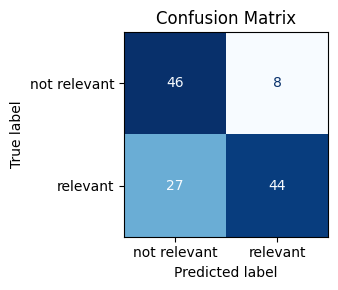

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not relevant','relevant'])
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Confusion Matrix') #put title before to avoid cropping
plt.gcf().set_size_inches(4, 3) 

# Prevent cropping
plt.tight_layout()

#plt.savefig('./img/confusion_relevant_ori_trafbal_pauOLD.png') # Save the figure before showing
plt.show()

## Save the model 

In [27]:
# Save the best model
model.save('./model/relevant_arch_hyper.h5')

model_json = model.to_json()
with open("./model/relevant_arch_hyper.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('./model/relevant_weight_hyper.h5')

c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Print the contents of the saved JSON file for verification
with open("./model/relevant_arch_hyper.json", "r") as json_file:
    saved_json_content = json_file.read()
    print("Contents of saved JSON file:")
    print(saved_json_content)

Contents of saved JSON file:
{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 134], "dtype": "float32", "sparse": false, "ragged": false, "name": "embedding_1_input"}}, {"class_name": "Embedding", "config": {"name": "embedding_1", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 134], "input_dim": 3500, "output_dim": 200, "embeddings_initializer": {"module": "keras.initializers", "class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null}, "registered_name": null}, "embeddings_regularizer": null, "activity_regularizer": null, "embeddings_constraint": null, "mask_zero": false, "input_length": 134}}, {"class_name": "Bidirectional", "config": {"name": "bidirectional_2", "trainable": true, "dtype": "float32", "layer": {"module": "keras.layers", "class_name": "LSTM", "config": {"name": "lstm_2", "trainable": true, "dtype": "float32", "return_sequences"

## Use the model

In [1]:
from keras.models import model_from_json

with open("./model/relevant_arch_hyper.json", "r") as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)

#model = model_from_json('./model/relevant_arch_hyper.json')
model.load_weights('./model/relevant_weight_hyper.h5') 

## Extract feature of test model

In [5]:
from tensorflow.keras import Model

feature_extraction_model = Model(inputs=model.input, outputs=model.layers[-2].output) #feature before dense(last layer)
feature_train = feature_extraction_model.predict(X_train)  
feature_test = feature_extraction_model.predict(X_test)  
print('feature_trin',feature_train.shape)
print('feature_test',feature_test.shape)

4/4 [==============================] - 0s 99ms/step
feature_trin (499, 128)
feature_test (125, 128)


## SVC tuning


In [8]:
import optuna
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Define search space for hyperparameters
    C = trial.suggest_loguniform('C', 1e-10, 1e10)
    gamma = trial.suggest_loguniform('gamma', 1e-10, 1e10)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    
    # Initialize SVC with hyperparameters
    svc = SVC(C=C, gamma=gamma, kernel=kernel)
    
    # Evaluate SVC model using cross-validation
    f1_scores = cross_val_score(svc, feature_train, Y_train, cv=5, scoring='f1_weighted')
    f1 = f1_scores.mean()
    
    return f1

# Create Optuna study
study = optuna.create_study(directions=["minimize", "maximize"])
study.optimize(objective, n_trials=100)

# Get the best hyperparameters and F1 score
best_params = study.best_params
best_f1 = study.best_value


[I 2024-05-01 23:24:55,865] A new study created in memory with name: no-name-97fa29cd-c3c9-4bf7-a1ce-6bdc5df3dd30
C:\Users\natkn\AppData\Local\Temp\ipykernel_4000\3383587226.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-10, 1e10)
C:\Users\natkn\AppData\Local\Temp\ipykernel_4000\3383587226.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-10, 1e10)
[I 2024-05-01 23:24:55,930] Trial 0 finished with value: -0.352434952522788 and parameters: {'C': 1.301885245305066e-09, 'gamma': 75991.1821492342, 'kernel': 'linear'}. Best is trial 0 with value: -0.352434952522788.
C:\Users\natkn\AppDat

In [31]:
import optuna
from sklearn.svm import SVC
from sklearn.metrics import f1_score


# Define objective function for Optuna
def objective(trial):
    # Define search space for hyperparameters
    C = trial.suggest_loguniform('C', 1e-10, 1e10)
    gamma = trial.suggest_loguniform('gamma', 1e-10, 1e10)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    
    # Initialize SVC with hyperparameters
    svc = SVC(C=C, gamma=gamma, kernel=kernel)
    
    # Train and evaluate SVC model
    svc.fit(feature_train, Y_train)
    y_pred = svc.predict(feature_test)
    f1 = f1_score(Y_test, y_pred, average='weighted')


    return f1

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100) #30

# Get the best hyperparameters and F1 score
best_params = study.best_params
best_f1 = study.best_value

print("Best F1 Score:", best_f1)
print("Best Parameters:", best_params)


[I 2024-04-30 15:02:48,073] A new study created in memory with name: no-name-75051bfe-8090-400d-8c1b-0e9df364c1e2
C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\648531972.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-10, 1e10)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\648531972.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-10, 1e10)
[I 2024-04-30 15:02:48,115] Trial 0 finished with value: 0.26064804469273745 and parameters: {'C': 2.325256359980876e-09, 'gamma': 187656.69398716243, 'kernel': 'linear'}. Best is trial 0 with value: 0.26064804469273745.
C:\Users\natkn\App

In [30]:
svc = SVC(probability=True)
#svc.build(input_shape=(None, 1))
history = svc.fit(features, Y_train) 


In [31]:
probs = history.predict_proba(features)

In [34]:
import joblib
joblib.dump(svc, './model/svc_model.pkl')

['./model/svc_model.pkl']

## Predicting

In [35]:
'''feature_extraction_model = Model(inputs=model.input, outputs=model.layers[-2].output) #feature before dense(last layer)
features = feature_extraction_model.predict(X_test)  ''' #additional feature for future test

4/4 [==============================] - 3s 151ms/step


In [36]:
probs_train = history.predict_proba(feature_train)
probs_test = history.predict_proba(feature_test)
probs_bin_train = history.predict(feature_train)
probs_bin_test = history.predict(feature_test)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

print(feature_train.shape)
print(feature_test.shape)
    
print(probs_train.shape)
print(probs_test.shape)

In [37]:
probs_test

array([[0.4905997 , 0.5094003 ],
       [0.90982205, 0.09017795],
       [0.03439241, 0.96560759],
       [0.70815852, 0.29184148],
       [0.59798468, 0.40201532],
       [0.94300618, 0.05699382],
       [0.92181786, 0.07818214],
       [0.52180536, 0.47819464],
       [0.76192833, 0.23807167],
       [0.86538675, 0.13461325],
       [0.16958376, 0.83041624],
       [0.26094288, 0.73905712],
       [0.54562298, 0.45437702],
       [0.09049676, 0.90950324],
       [0.74544226, 0.25455774],
       [0.69533213, 0.30466787],
       [0.72612039, 0.27387961],
       [0.88263781, 0.11736219],
       [0.81949773, 0.18050227],
       [0.70766157, 0.29233843],
       [0.56312068, 0.43687932],
       [0.16822086, 0.83177914],
       [0.63696226, 0.36303774],
       [0.43712739, 0.56287261],
       [0.4439212 , 0.5560788 ],
       [0.46673826, 0.53326174],
       [0.49451255, 0.50548745],
       [0.10793244, 0.89206756],
       [0.40583485, 0.59416515],
       [0.86324094, 0.13675906],
       [0.

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

f1 = f1_score(Y_train, probs_bin_train)
print("Train F1 score:", f1)
loss_1 = log_loss(Y_train,probs_bin_train) 
print(loss_1)
conf_matrix1 = confusion_matrix(Y_train, probs_bin_train)
print(conf_matrix1)

f1 = f1_score(Y_test, probs_bin_test)
print("Test F1 score:", f1)
loss_2 = log_loss(Y_test,probs_bin_test) 
print(loss_2)
conf_matrix2 = confusion_matrix(Y_test, probs_bin_test)
print(conf_matrix2)

## Done

In [33]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, log_loss


# Evaluate the model on the test set
evaluation = model.evaluate(X_test, Y_test)

loss = evaluation[0]
accuracy = evaluation[1]

# Print evaluation metrics
print('Train set evaluate\n  Loss: {:0.3f}\n  F1 Score: {:0.3f}'.format(loss, accuracy))

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

f1 = f1_score(Y_test, y_pred_binary)
loss = log_loss(Y_test, y_pred_binary)
conf_matrix = confusion_matrix(Y_test, y_pred_binary)

print("F1 Score:", f1)
print("Log Loss:", loss)
print("Confusion Matrix:\n", conf_matrix)

Tensor("mul_4:0", shape=(), dtype=float32)
16/16 [==============================] - 2s 47ms/step - loss: 0.6796 - f1_m: 0.0698
Train set evaluate
  Loss: 0.680
  F1 Score: 0.070
4/4 [==============================] - 1s 46ms/step
F1 Score: 0.02777777777777778
Log Loss: 20.1844458979056
Confusion Matrix:
 [[54  0]
 [70  1]]


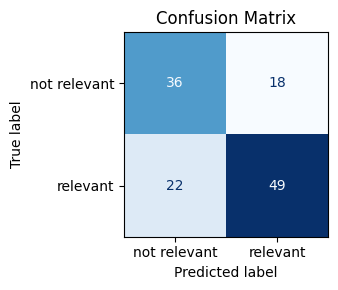

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Confusion Matrix') #put title before to avoid cropping
plt.gcf().set_size_inches(4, 3) 

# Prevent cropping
plt.tight_layout()

#plt.savefig('./img/confusion_relevant_hyperparam.png') # Save the figure before showing
plt.show()

saving model

In [25]:
# Save the best model
model.save('./model/relevant_arch_hyper.h5')

'''model_json = model.to_json()
with open("./model/relevant_arch_ori_n_trafbal.json", "w") as json_file:
    json_file.write(model_json)'''
    
model.save_weights('./model/relevant_weight_hyper.h5')

c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## investigate later

In [ ]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the objective function for Optuna
def objective(trial):
    
    C = trial.suggest_float('C', 0.1, 100)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])

    # Initialize the SVC model
    svc = SVC(C=C, kernel=kernel)

    # Train the model on X_test and Y_pred
    svc.fit(X_test, Y_pred)

    # Evaluate the model and return the score
    score = svc.score(X_test, Y_test)
    return score

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Run Optuna optimization
study.optimize(objective, n_trials=100)

# Get the best hyperparameters and score
best_params = study.best_params
best_score = study.best_value

# Create the SVC model with the best hyperparameters
svc = SVC(**best_params)

# Train the model on X_test and Y_pred
svc.fit(X_test, Y_pred)

# Save the best model
# Replace 'model.pkl' with your desired file name
svc.save('model.pkl')

## dont bother 🏖️😒👌
